Notebook to play with WOD data using the wodpy package

WOD data
* http://www.nodc.noaa.gov/OC5/WOD/datageo.html

wodpy package
* https://github.com/BillMills/wodpy

Playing with new pandas supprot

In [1]:
from wodpy import wod

from mpl_toolkits.basemap import Basemap

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import netCDF4 as nc
from salishsea_tools import viz_tools, tidetools
import numpy as np
import glob
import os
import datetime
from salishsea_tools.nowcast import analyze

%matplotlib inline

In [2]:
#make plots pretty
sns.set_style('darkgrid')

#Load Model Grid

In [3]:
f=nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
bathy=f.variables['Bathymetry'][:]
X=f.variables['nav_lon'][:]
Y=f.variables['nav_lat'][:]

#Load WOD observations

Experiment with functions to manipulate the data.

In [4]:
def extract_data(filename, lat_min, lat_max, lon_min, lon_max, start_date, end_date ):
    """Reads a WOD file (filename). 
    Returns a list of dataframes with profiles in the region defined by lat_min, lat_max, lon_min, lon_max 
    and between start_date, end_date (datetime objects)
    """
    
    file = open(filename)
    
    #empty list for gatherthing profiles.
    list_data=[]
    
    #loop through profiles
    profile = wod.WodProfile(file)
    while not profile.is_last_profile_in_file(file):
        df=profile.df()
        profile_date = datetime.datetime(df.year, df.month, df.day)
        #isolate
        if profile_date >= start_date and profile_date <= end_date:
            if df.latitude >= lat_min and df.latitude <= lat_max:
                if df.longitude >= lon_min and df.longitude <= lon_max:
                    list_data.append(df)
        profile = wod.WodProfile(file)
        
    #again for last profile
    df=profile.df()
    profile_date = datetime.datetime(df.year, df.month, df.day)
    #isolate
    if profile_date >= start_date and profile_date <= end_date:
        if df.latitude >= lat_min and df.latitude <= lat_max:
            if df.longitude >= lon_min and df.longitude <= lon_max:
                list_data.append(df)
   
    
    return list_data

In [5]:
#define region
lon_min=-123.5; lat_min=49;
lon_max=-123.2; lat_max=49.2;

#define time period
sdt = datetime.datetime(2000,1,1)
edt = datetime.datetime(2015,12,31)

data = extract_data('/ocean/nsoontie/MEOPAR/WOD/CTDS7412', lat_min, lat_max, lon_min, lon_max, sdt, edt)    

In [10]:
data[0].latitude, data[0].longitude, data[0].year, data[0].month, data[0].day, data[0].uid

(49.0302, -123.4368, 2000, 4, 27, 10499682)

In [7]:
data[0]

,depth,depth_qc,salinity,salinity_qc_flag,temperature,temperature_qc_flag
0,0,0,NaN,NaN,10.378,0
1,5,0,NaN,NaN,10.042,0
2,10,0,NaN,NaN,9.026,0
3,15,0,NaN,NaN,8.760,0
4,20,0,NaN,NaN,8.596,0
5,25,0,NaN,NaN,8.478,0
6,30,0,NaN,NaN,8.429,0
7,35,0,NaN,NaN,8.417,0
8,40,0,NaN,NaN,8.370,0
9,45,0,NaN,NaN,8.248,0


Examine data by plotting

(48.4, 49.5)

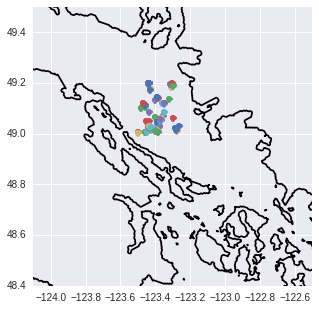

In [8]:
fig,axm = plt.subplots(1,figsize=(5,5))
for df in data:
    axm.plot(df.longitude, df.latitude, 'o')
viz_tools.plot_coastline(axm,f,coords='map')
axm.set_xlim([-124.1,-122.5])
axm.set_ylim([48.4,49.5])